# **PROJECT-3. EDA + Feature Engineering. Соревнование на Kaggle**

# 1. Введение

## В РЕЗУЛЬТАТЕ РАБОТЫ НАД ДАННЫМ ПРОЕКТОМ ВЫ:

✔️ создадите свою первую модель, основанную на алгоритмах машинного обучения;

✔️ примете участие в соревновании на Kaggle;

✔️ поймёте, как правильно «подготовить» данные, чтобы ваша модель работала лучше.

## ЧЕМ МЫ БУДЕМ ЗАНИМАТЬСЯ?

В этом модуле вы попробуете решить свой первый настоящий кейс и создадите первую модель, использующую алгоритмы машинного обучения.

→ Не пугайтесь, вам не придётся изучать машинное обучение в экстремально короткие сроки! На самом деле код для создания и обучения модели мы вам предоставим в готовом виде, и этот код будет довольно простым. Всему этому более подробно вы научитесь позже, в модулях по машинному обучению. Пока ваша задача будет состоять в том, чтобы качественно подготовить данные для обучения модели.

Скоро вы убедитесь не только в теории, но и на практике, что тщательная очистка данных, проектирование признаков и разведывательный анализ данных способны повысить точность модели в два и более раз, и владение этими навыками играет в машинном обучении не меньшую роль, чем умение выбрать алгоритм и настроить модель.

Итак, вы создадите свою первую модель, а после этого используете свои навыки для участия в соревновании на платформе Kaggle.

## КАКОЙ КЕЙС РЕШАЕМ?

Представьте, что вы работаете дата-сайентистом в компании Booking. Одна из проблем компании — это нечестные отели, которые накручивают себе рейтинг. Одним из способов обнаружения таких отелей является построение модели, которая предсказывает рейтинг отеля. Если предсказания модели сильно отличаются от фактического результата, то, возможно, отель ведёт себя нечестно, и его стоит проверить.

Вам поставлена задача создать такую модель. Готовы приступить?

# 2. Разбираемся с данными

✍ В этом модуле вы будете работать с датасетом, в котором содержатся сведения о 515 000 отзывов на отели Европы. Модель, которую вы будете обучать, должна предсказывать рейтинг отеля по данным сайта Booking на основе имеющихся в датасете данных. Изученные нами навыки разведывательного анализа помогут улучшить модель. Как? Узнаем дальше.

Скачайте файл [hotels.csv](https://drive.google.com/file/d/1Qj0iYEbD64eVAaaBylJeIi3qvMzxf2C_/view?usp=sharing) и загляните в него.

Первоначальная версия датасета содержит 17 полей со следующей информацией:

* hotel_address — адрес отеля;
* review_date — дата, когда рецензент разместил соответствующий отзыв;
* average_score — средний балл отеля, рассчитанный на основе последнего комментария за последний год;
* hotel_name — название отеля;
* reviewer_nationality — страна рецензента;
* negative_review — отрицательный отзыв, который рецензент дал отелю;
* review_total_negative_word_counts — общее количество слов в отрицательном отзыв;
* positive_review — положительный отзыв, который рецензент дал отелю;
* review_total_positive_word_counts — общее количество слов в положительном отзыве.
* reviewer_score — оценка, которую рецензент поставил отелю на основе * своего опыта;
* total_number_of_reviews_reviewer_has_given — количество отзывов, которые рецензенты дали в прошлом;
* total_number_of_reviews — общее количество действительных отзывов об отеле;
* tags — теги, которые рецензент дал отелю;
* days_since_review — количество дней между датой проверки и датой очистки;
* additional_number_of_scoring — есть также некоторые гости, которые просто поставили оценку сервису, но не оставили отзыв. Это число указывает, сколько там действительных оценок без проверки.
* lat — географическая широта отеля;
* lng — географическая долгота отеля.

In [1]:
import pandas as pd

data = pd.read_csv('data/hotels.csv')
hotels = data
hotels.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060


In [310]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [311]:
cols_null_percent = hotels.isnull().mean() * 100
cols_null_percent

hotel_address                                 0.00000
additional_number_of_scoring                  0.00000
review_date                                   0.00000
average_score                                 0.00000
hotel_name                                    0.00000
reviewer_nationality                          0.00000
negative_review                               0.00000
review_total_negative_word_counts             0.00000
total_number_of_reviews                       0.00000
positive_review                               0.00000
review_total_positive_word_counts             0.00000
total_number_of_reviews_reviewer_has_given    0.00000
reviewer_score                                0.00000
tags                                          0.00000
days_since_review                             0.00000
lat                                           0.63288
lng                                           0.63288
dtype: float64

In [312]:

cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

lng    0.63288
lat    0.63288
dtype: float64

In [313]:
#создаем словарь имя столбца: число(признак) на который надо заменить пропуски
values = {
    'lng': 0,
    'lat': 0
}
#заполняем пропуски в соответствии с заявленным словарем
hotels = hotels.fillna(values)
#выводим результирующую долю пропусков
hotels.isnull().mean()

hotel_address                                 0.0
additional_number_of_scoring                  0.0
review_date                                   0.0
average_score                                 0.0
hotel_name                                    0.0
reviewer_nationality                          0.0
negative_review                               0.0
review_total_negative_word_counts             0.0
total_number_of_reviews                       0.0
positive_review                               0.0
review_total_positive_word_counts             0.0
total_number_of_reviews_reviewer_has_given    0.0
reviewer_score                                0.0
tags                                          0.0
days_since_review                             0.0
lat                                           0.0
lng                                           0.0
dtype: float64

In [314]:
columns = list(hotels.columns)
columns

TypeError: 'str' object is not callable

In [ ]:
# Разделми признаки на категориальные и непрерывные

object_cols = list()
n_cols = list()
for column in columns:
    if str(hotels[column].dtype) != 'int64' and (hotels[column].dtype) != 'float64':
        object_cols.append(column)
    else:
        n_cols.append(column)

object_cols
        

['hotel_address',
 'review_date',
 'hotel_name',
 'reviewer_nationality',
 'negative_review',
 'positive_review',
 'tags',
 'days_since_review']

In [ ]:
n_cols

['additional_number_of_scoring',
 'average_score',
 'review_total_negative_word_counts',
 'total_number_of_reviews',
 'review_total_positive_word_counts',
 'total_number_of_reviews_reviewer_has_given',
 'reviewer_score',
 'lat',
 'lng']

In [ ]:
hotels_num = hotels.drop(labels=object_cols, axis=1)
hotels_num

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,lat,lng
0,581,8.4,3,1994,4,7,10.0,51.507894,-0.143671
1,299,8.3,3,1361,2,14,6.3,51.521009,-0.123097
2,32,8.9,6,406,0,14,7.5,48.845377,2.325643
3,34,7.5,0,607,11,8,10.0,48.888697,2.394540
4,914,8.5,4,7586,20,10,9.6,52.385601,4.847060
...,...,...,...,...,...,...,...,...,...
386798,107,9.0,0,617,10,10,8.8,51.494028,-0.191050
386799,272,8.4,0,3224,93,1,9.2,48.192379,16.399451
386800,457,6.8,12,2751,9,21,8.3,51.520795,-0.131084
386801,365,8.1,0,1567,6,28,9.2,51.515125,-0.160066


# 3. Машинное обучение для самых маленьких

✍ Что нужно сделать в этом юните?

Создать свою первую модель, основанную на алгоритмах машинного обучения.

Код для создания модели мы предоставим, но чтобы модель заработала, в неё нужно передать правильные данные. Приведение данных в нужный вид и будет вашей задачей в этом юните.

Однако прежде мы рассмотрим основные шаги, которые нужно проделать с данными от загрузки до получения результатов модели.

После знакомых вам шагов подготовки датасета, а именно очистки, анализа, проектирования признаков и их преобразования, дата-сайентисты приступают к обучению модели. Для этого необходимо разделить датафрейм, создать, обучить и оценить качество модели.

Мы подготовили для вас [ноутбук](https://lms.skillfactory.ru/assets/courseware/v1/0a04828af83e98c62bf8782d920350d6/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/EDA_Project_3_model.ipynb) с кодом для обучения модели. Далее мы шаг за шагом разберём все описанные в нём действия.

## 1. РАЗДЕЛЕНИЕ НАБОРА ДАННЫХ

Прежде всего, для создания модели необходимо разделить датафрейм на набор данных, которые мы будем использовать для обучения модели, именуемый , и на целевую переменную — величину, значение которой мы будем предсказывать,  (в нашем случае это рейтинг отелей).

![](https://lms.skillfactory.ru/assets/courseware/v1/2962190377a2a4c55ae3f6b5643f1ccc/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-u2-pr3_3_1.png)

Далее каждый из полученных наборов мы делим на тренировочный (train, используется для обучения модели) и тестовый (test, используется для оценки точности модели). Такое деление осуществляется с помощью специального метода train_test_split() библиотеки sklearn. В параметрах метода (параметр test_size) мы указываем, какую часть исходного датафрейма нужно оставить для тестирования модели. В нашем коде эта часть составляет 25 %, или 0.25.

Не существует идеального соотношения обучающей и тестовой выборки, однако принято выделять на часть обучения больше данных, около ⅔, а оставшуюся часть используют для проверки — ⅓ выборки. Таким образом, самые популярные значения параметра test_size составляют 0.3, 0.25, 0.2.

In [ ]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х — данные с информацией об отелях, у — целевая переменная (рейтинги отелей)  
X = hotels_num.drop(['reviewer_score'], axis = 1)  
y = hotels_num['reviewer_score']  
    
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  
    
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" — для тестирования.  
# Для тестирования мы будем использовать 25 % от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## 2. СОЗДАНИЕ И ОБУЧЕНИЕ МОДЕЛИ

Сам процесс создания и тестирования модели занимает всего четыре строчки кода. В качестве алгоритма мы будем использовать популярный и довольно мощный алгоритм [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html). Он реализован в библиотеке sklearn.


In [ ]:
# # Импортируем необходимые библиотеки:  
# from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
# from sklearn import metrics # инструменты для оценки точности модели  
    
# # Создаём модель  
# regr = RandomForestRegressor(n_estimators=100)  
    
# # Обучаем модель на тестовом наборе данных  
# regr.fit(X_train, y_train)  
    
# # Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# # Предсказанные значения записываем в переменную y_pred  
# y_pred = regr.predict(X_test)

## 3. ОЦЕНКА КАЧЕСТВА МОДЕЛИ

Для оценки качества модели — точности прогнозов, сделанных моделью, — мы будем использовать метрику (некий числовой показатель), которая называется **MAPE (mean absolute percentage error)**, средняя абсолютная процентная ошибка. Эту метрику очень легко интерпретировать. Если у вас MAPE = 11.4 %, то это говорит о том, что ошибка составила 11.4 % от фактических значений.

$$
MAPE=100 \% *1/n \sum^n_{i=1}\frac{|y_{true_i} - y_{pred_i}|}{|y_{true_i}|}
$$

где $y_{true_i}$ — фактические значения прогноза, a $ y_{pred_i}$ — предсказанные.

Для расчета MAPE сравним предсказанные нашей моделью значения с реальными и посмотрим на значение ошибки.


In [ ]:
# # Сравниваем предсказанные значения (y_pred) с реальными (y_test) и смотрим, насколько они отличаются  
# # Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений в отношении фактических.  
# print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.14131623703904372


Попробуйте запустить весь этот код. Что происходит? Мы видим сообщение об ошибке... Давайте попробуем разобраться в причинах произошедшего.

Итак, мы выяснили, что для корректной работы все данные в датафрейме, который вы будете использовать при обучении модели, должны быть в числовых форматах int или float. 

Есть ещё одно ограничение: в столбцах не должно быть пропущенных значений. Вместо каждого пропущенного значения вам нужно будет вычислить и поместить в ячейку максимально близкое к реальности значение.

→ Таким образом, чтобы код, отвечающий за обучение модели, заработал, мы должны использовать в нём датафрейм, содержащий только количественные признаки и не содержащий пропущенных значений.

На первом этапе для создания такого датафрейма давайте просто удалим столбцы, содержащие данные типов object и string и заполним пропущенные значения каким-то одним значением (unknown, нулём или средним арифметическим) для всего столбца.

Для выполнения этих операций вам понадобятся следующие методы библиотеки Pandas:

```drop``` — метод для удаления ненужных строк и столбцов (обратите внимание, что в материалах данного модуля этот метод разрешается использовать только для удаления столбцов);

```fillna``` — метод для заполнения пропущенных значений в столбце или во всём датафрейме.

После выполнения всех преобразований попробуйте заново запустить код уже с очищенными данными.

# 4. Лучший способ добиться успеха — следовать советам

✍ Что делать дальше?

Повысить точность прогнозов, которые делает модель, с помощью более тщательной подготовки данных.

При подготовке датасета необходимо будет вспомнить все шаги, которые мы проделывали в модулях EDA. Нам нужно будет не только избавиться от пропущенных значений и нечисловых признаков, но и спроектировать новые признаки на основе информации, уже содержащейся в данных, или используя внешние источники данных, если это возможно. Также мы закодируем и преобразуем признаки, а после отберём лучшие из них.

Задачу, которая стоит перед вами, можно свести к пяти пунктам:

* Удаление строковых значений. Вам необходимо удалить из набора данных столбцы, данные в которых представлены не числами.
* Очистка от пропущенных значений. На предыдущем шаге мы делали это самым грубым из всех возможных способов, сейчас попробуйте подойти к процессу более гибко.
* Создание новых признаков. Мы попробуем создать новые столбцы с данными из существующих данных или с использованием внешних источников.
* Преобразование признаков. Применим различные преобразования над признаками вроде нормализации, стандартизации.
* Отбор признаков. Используем анализ мультиколлинеарности как шаг отбора признаков для модели.

**Ваша задача** — при помощи этих шагов и рекомендаций повысить качество предсказания. Чтобы понять, что качество улучшилось, ориентируйтесь на метрику MAPE: чем она меньше, тем лучше. Рассмотрим шаги подробнее.

### СТРОКОВЫЕ ДАННЫЕ

В исходном наборе данных всего девять столбцов содержат числовые данные. Так что просто удалить все object-значения и считать задачу выполненной не получится. Мы сделали это в прошлом юните, чтобы получить значение метрики. Но чтобы улучшить качество модели, вам перед удалением придётся очень основательно поработать со строковыми данными и извлечь из них как можно больше информации, которую можно представить в числовом виде.

### ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ

Мы уже говорили о том, что в задачах по машинному обучению принято не удалять строки с пустыми значениями, а заполнять их максимально близкими к реальности данными. Используйте знания из модулей очистки данных или вспомните о мере центральной тенденции в юнитах статистики. Попробуйте различные способы и ориентируйтесь на итоговую метрику.

### НОВЫЕ ПРИЗНАКИ

Это, пожалуй, самая творческая часть работы на данном шаге. Создание новых признаков потребует от вас способности вникать в контент, умения подключать к работе интуицию, творческого подхода и готовности к экспериментам. Попробуйте извлечь несколько признаков из даты, проанализируйте датасет на возможность добавления внешних источников данных. При наличии времени разберите текстовые столбцы на признаки.

### ПРЕОБРАЗОВАНИЕ ПРИЗНАКОВ

Данные могут быть представлены в невыгодном для модели свете. Используйте изученные вами способы преобразования данных, чтобы сделать данные качественнее.

### ОТБОР ПРИЗНАКОВ

Признаки могут дублировать информацию. **Анализ мультиколлинеарности** мы будем использовать, чтобы выбрать уникальные признаки для модели.

Также перед обучением (после разделения выборки на X и y) мы можем оценить значимость каждого признака для целевой переменной — рейтинг отеля. При помощи теста мы сможем узнать, как географическая долгота отеля и количество негативных отзывов влияют на его рейтинг.

Для оценки значимости категориальных признаков будем использовать тест **хи-квадрат**, для непрерывных признаков — тест **ANOVA**.

Для оценки значимости категориальных переменных будем использовать изученный нами непараметрический тест хи-квадрат, реализованный в библиотеке [sklearn.feature_selection.chi2](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html#sklearn.feature_selection.chi2). Метод возвращает массив значений хи-квадрат и p-value для каждого признака. Используем только значения хи-квадрат и выведем их на графике:

In [ ]:
hotels.head(1)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671


In [ ]:
object_cols

['hotel_address',
 'review_date',
 'hotel_name',
 'reviewer_nationality',
 'negative_review',
 'positive_review',
 'tags',
 'days_since_review']

In [ ]:
n_cols

['additional_number_of_scoring',
 'average_score',
 'review_total_negative_word_counts',
 'total_number_of_reviews',
 'review_total_positive_word_counts',
 'total_number_of_reviews_reviewer_has_given',
 'reviewer_score',
 'lat',
 'lng']

In [ ]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х — данные с информацией об отелях, у — целевая переменная (рейтинги отелей)  
X = hotels.drop(['reviewer_score'], axis = 1)  
y = hotels['reviewer_score']  
    
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  
    
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" — для тестирования.  
# Для тестирования мы будем использовать 25 % от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# непрерывные признаки
num_cols = ['total_number_of_reviews', 'review_total_negative_word_counts']

# категориальные признаки
cat_cols = ['average_score', 'lat']

<AxesSubplot:>

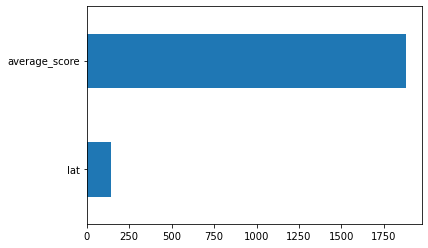

In [ ]:
y=y.astype('int')

from sklearn.feature_selection import chi2 # хи-квадрат

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

Добавьте и другие категориальные признаки в список cat_cols, чтобы оценить их значимость в определении рейтинга отеля.

<AxesSubplot:>

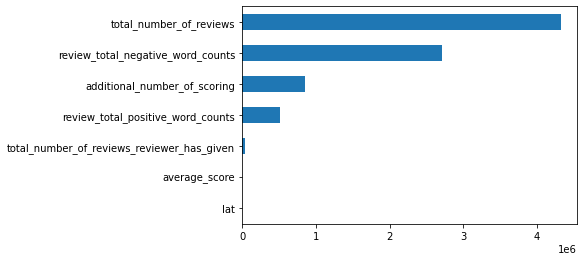

In [ ]:
# категориальные признаки
cat_cols = [
    'average_score',
    'review_total_negative_word_counts',
    'total_number_of_reviews',
    'review_total_positive_word_counts',
    'total_number_of_reviews_reviewer_has_given',
    'lat',
    ]

y=y.astype('int')

from sklearn.feature_selection import chi2 # хи-квадрат

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

Для оценки значимости непрерывных переменных будем использовать функцию [f_classif](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html#sklearn.feature_selection.f_classif) из библиотеки sklearn. В основе метода оценки значимости переменных лежит изученный вами в юнитах по статистике анализ (ANOVA). Основу процедуры составляет обобщение результатов двух выборочных t-тестов для независимых выборок (2-sample t).

Метод возвращает двумерный массив f-статистик и p-value для каждого признака. В качестве меры значимости мы будем использовать значение f-статистики. Чем значение статистики выше, тем меньше вероятность того, что средние значения не отличаются, и тем важнее данный признак для нашей модели.

<AxesSubplot:>

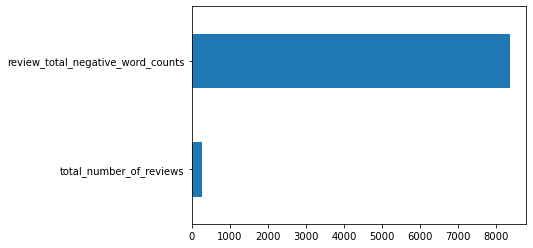

In [ ]:
from sklearn.feature_selection import f_classif # anova

imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

Добавьте и другие непрерывные признаки в список num_cols, чтобы оценить их значимость в определении рейтинга отеля.

In [ ]:
n_cols

['additional_number_of_scoring',
 'average_score',
 'review_total_negative_word_counts',
 'total_number_of_reviews',
 'review_total_positive_word_counts',
 'total_number_of_reviews_reviewer_has_given',
 'reviewer_score',
 'lat',
 'lng']

<AxesSubplot:>

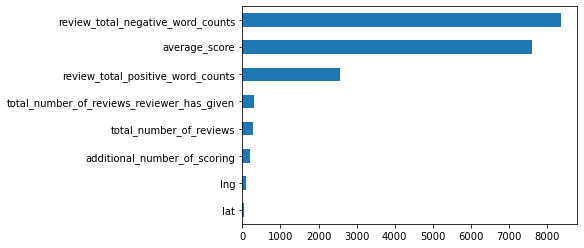

In [ ]:
num_cols = [
    'additional_number_of_scoring',

    'review_total_negative_word_counts',
    'total_number_of_reviews',
    'review_total_positive_word_counts',
    'total_number_of_reviews_reviewer_has_given',
    'lat',
    'lng']


from sklearn.feature_selection import f_classif # anova

imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

Результаты данных тестов вы сможете использовать в своих исследования при отборе признаков: удаляйте менее значимые признаки и сравнивайте результаты качества полученных моделей.

→ Тесты chi2 и f_classif можно использовать для выбора n заданных признаков с наивысшими значениями статистик с помощью метода SelectKBest. Подробнее об этом вы можете прочесть в руководстве [Feature selection](https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection).

Попробуйте применить данные  рекомендации для улучшения качества предсказания. Оцените, насколько изменилась метрика.

→ Если не знаете, с чего начать, ниже мы разместили несколько вопросов. С их помощью вам будет проще понять, какие признаки можно извлечь из данных.

### Задание 4.2
Сколько отелей представлено в наборе данных?

In [ ]:
hotels['hotel_name'].nunique()

1492

### Задание 4.3

Ответьте на вопросы о дате размещения отзывов.
Когда был оставлен самый свежий отзыв? Введите ответ в формате yyyy-mm-dd.

In [ ]:
hotels['review_date'] = pd.to_datetime(hotels['review_date'], format='%Y%m%d')

In [ ]:
hotels['review_date'].max()

Timestamp('2017-08-03 00:00:00')

Когда был оставлен самый первый отзыв? Введите ответ в формате yyyy-mm-dd.

In [ ]:
hotels['review_date'].min()

Timestamp('2015-08-04 00:00:00')

### Задание 4.4

Сколько уникальных тегов представлено в наборе данных?

In [ ]:
hotels['tags'].nunique()

47135

In [ ]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [385]:
example = "[' Leisure trip ', ' Couple ', ' Studio Suite ', ' Stayed 2 nights ', ' Submitted from a mobile device ']"
def get_tags(tags):

    tags_list = tags.replace("['",'').replace("']", '').replace("'",'').split(sep = ', ')
    for i in range(len(tags_list)):
        tags_list[i] = tags_list[i][1:-1]

    return tags_list
    
get_tags(example)

['Leisure trip',
 'Couple',
 'Studio Suite',
 'Stayed 2 nights',
 'Submitted from a mobile device']

In [396]:
hotels['tags'] = hotels['tags'].apply(get_tags)

tags = []

hotels['tags'].apply(lambda x: tags.extend(x))

tags_set = set(tags)

len(tags_set)

2368

In [477]:
tags_dict = {}

for tag in tags:
    if tag not in tags_dict:
        tags_dict[tag] = 1
    else:
        tags_dict[tag] += 1
        

max(tags_dict, key=tags_dict.get)

'Leisure trip'

In [478]:
nights_dict = tags_dict.copy()

for key in tags_set:
    if 'Stayed' not in key:
        nights_dict.pop(key)
    
max(nights_dict, key=nights_dict.get)

'Stayed 1 night'

In [491]:
tags_data = pd.DataFrame({'tag':tags_dict.keys(), 'cnt':tags_dict.values()})
tags_data = tags_data.sort_values(by='cnt', ascending=False, ignore_index=True)
display(tags_data.head(20))
print(tags_data['cnt'].sum())

,tag,cnt
0,Leisure trip,313593
1,Submitted from a mobile device,230778
2,Couple,189212
3,Stayed 1 night,145373
4,Stayed 2 nights,100263
5,Solo traveler,81235
6,Stayed 3 nights,72000
7,Business trip,61989
8,Group,49088
9,Family with young children,45836


1767522
